# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [4]:
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [12]:
fitbit.sample()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
210,2015-12-04,2835,1074,8.08,11,1.1,146,39,52,1271,...,5.020678,Friday,4.0,1,5.466667,90.607735,6.733333,90.178571,December,12


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [15]:
# AVERAGE STEPS BY MONTH_ENCODED
fitbit.groupby("Months_encoded")["Steps"].mean()

Months_encoded
1      9892.064516
2      8922.866667
3     10312.935484
4     13079.033333
5     10620.096774
6     12536.166667
7      9193.322581
8     11584.774194
9      9191.333333
10     8272.451613
11     9467.466667
12     8470.064516
Name: Steps, dtype: float64

<Figure size 864x288 with 0 Axes>

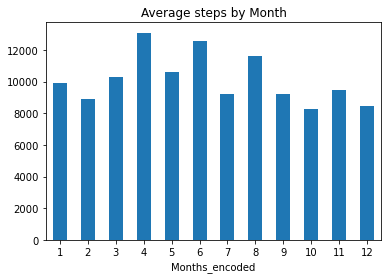

<Figure size 864x288 with 0 Axes>

In [32]:
avg_step_month = fitbit.groupby("Months_encoded")["Steps"].mean().plot(kind="bar", title="Average steps by Month")
plt.xticks(rotation=0)
plt.figure(figsize=(12,4))

In [48]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
fitbit.groupby("Work_or_Weekend")["Steps"].mean() 
# On average, the person is equally active on workdays and weekends
# 0 weekend
# 1 workday

Work_or_Weekend
0    10064.238095
1    10144.572519
Name: Steps, dtype: float64

<Figure size 864x288 with 0 Axes>

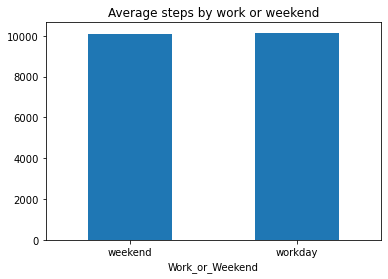

<Figure size 864x288 with 0 Axes>

In [44]:
avg_step_workweekend = fitbit.groupby("Work_or_Weekend")["Steps"].mean().plot(kind="bar", title="Average steps by work or weekend")
plt.xticks(ticks=[0,1], labels=["weekend", "workday"], rotation = 0)
plt.figure(figsize=(12,4))


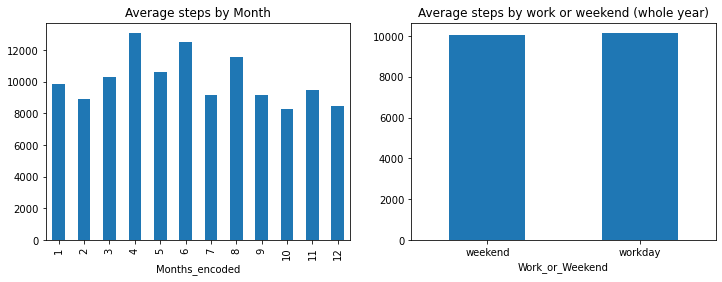

In [49]:
# Two plots together:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

avg_step_month = fitbit.groupby("Months_encoded")["Steps"].mean().plot(kind="bar", title="Average steps by Month", ax=axs[0])
plt.xticks(rotation=0) # Not working here? #TA help

avg_step_workweekend = fitbit.groupby("Work_or_Weekend")["Steps"].mean().plot(kind="bar", title="Average steps by work or weekend (whole year)", ax=axs[1])
plt.xticks(ticks=[0,1], labels=["weekend", "workday"], rotation = 0)

fig.figure.savefig("../figures/fitbit.jpg", dpi=1000)

**Plotting the mean of steps grouping by months and separating workdays from weekends**

In [115]:
fitbit["Months"].unique() # this will be my X axis

array(['May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'January', 'February', 'March', 'April'],
      dtype=object)

In [7]:
# defining filtering conditions for workdays (1) or weekends (0):

weekends = (fitbit["Work_or_Weekend"] == 0)
workdays = (fitbit["Work_or_Weekend"] == 1)

In [9]:
workdays.head() #checking that filtering works

0     True
1    False
2    False
3     True
4     True
Name: Work_or_Weekend, dtype: bool

In [8]:
weekends.head()

0    False
1     True
2     True
3    False
4    False
Name: Work_or_Weekend, dtype: bool

In [11]:
fitbit[workdays].head() # ok works

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.000,172,34,18,1094,...,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
6,2015-05-14,2687,5614,4.17,2,782.000,216,13,1,9830,...,2.591117,Thursday,3.0,1,6.350000,91.807229,6.750000,88.621444,May,5


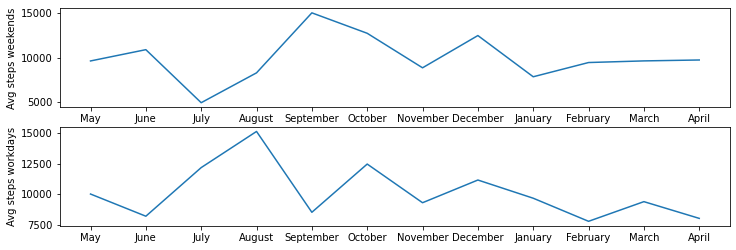

<Figure size 864x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,4)) # preparing the environment: graphs to be filled

# x axis:
x = fitbit["Months"].unique()
  
# y axes: y1 (top graph), y2 (bottom graph):
y1 = fitbit[weekends].groupby("Months_encoded")["Steps"].mean()
y2 = fitbit[workdays].groupby("Months_encoded")["Steps"].mean()
  
# first graph, weekends
plt.sca(ax[0])
plt.plot(x, y1)
plt.ylabel(ylabel="Avg steps weekends")

# second graph, workdays  
plt.sca(ax[1])
plt.plot(x, y2)
plt.ylabel(ylabel="Avg steps workdays")
      
plt.figure(figsize=(12,4));
plt.show() 

fig.figure.savefig("../figures/fitbit_by_month_workweekends.jpg", dpi=1000)

In [ ]:
# Now we can see how the pattern changes, which we couldn't see before. For instance, during september,
# the person walked a lot on weekends but not on workdays

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

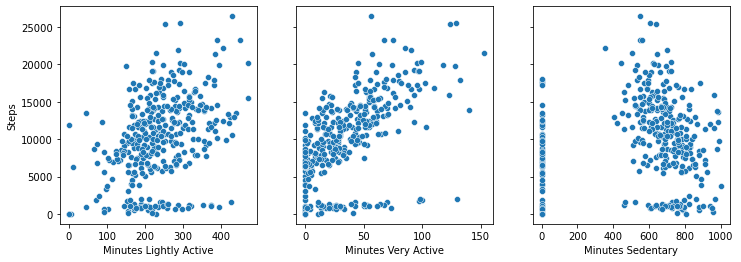

In [9]:
feature = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharey = True)

for i, f in enumerate(feature):
    sns.scatterplot(x=f, y="Steps", data=fitbit, ax=axs[i])

fig.figure.savefig("../figures/fitbit_scatterplots.jpg", dpi=1000)

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [10]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [40]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [52]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=['float64', 'int64']).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [53]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=['object']).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [58]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

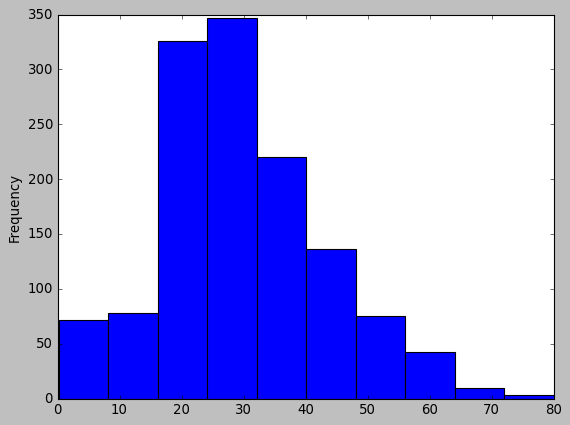

<Figure size 960x480 with 0 Axes>

In [80]:
fig = titanic.Age.plot.hist() # classic is ugly
plt.figure(figsize=(12,6))
fig.figure.savefig("../figures/titanic_age.jpg", dpi=1000)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

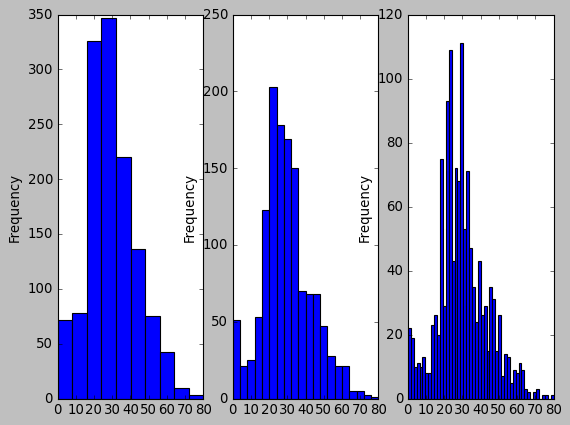

<Figure size 960x480 with 0 Axes>

In [81]:
fig, axs = plt.subplots(nrows=1, ncols=3)

titanic.Age.plot.hist(bins=10, ax=axs[0])
titanic.Age.plot.hist(bins=20, ax=axs[1])
titanic.Age.plot.hist(bins=50, ax=axs[2])

plt.figure(figsize=(12,6))
fig.figure.savefig("../figures/titanic_age_bins.jpg", dpi=1000)

#### How does the bin size affect your plot?

In [ ]:
"""
It increases the amount of information, since we are able to see more ages, but it makes it more difficult to read
"""

#### Use seaborn to show the distribution of column `Age`.

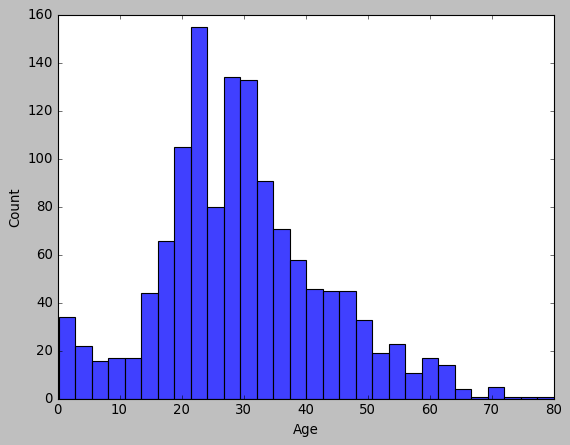

<Figure size 960x480 with 0 Axes>

In [82]:
fig = sns.histplot(data=titanic, x="Age")

plt.figure(figsize=(12,6))
fig.figure.savefig("../figures/titanic_age_sns.jpg", dpi=1000)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

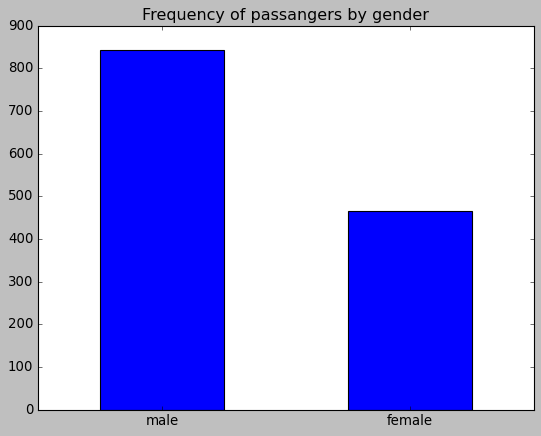

<Figure size 960x480 with 0 Axes>

In [85]:
# Method 1 - matplotlib
fig = titanic["Gender"].value_counts().plot(kind="bar", title="Frequency of passangers by gender")
plt.xticks(rotation=0);

plt.figure(figsize=(12,6))
fig.figure.savefig("../figures/titanic_age_matplotlib_gender.jpg", dpi=1000)

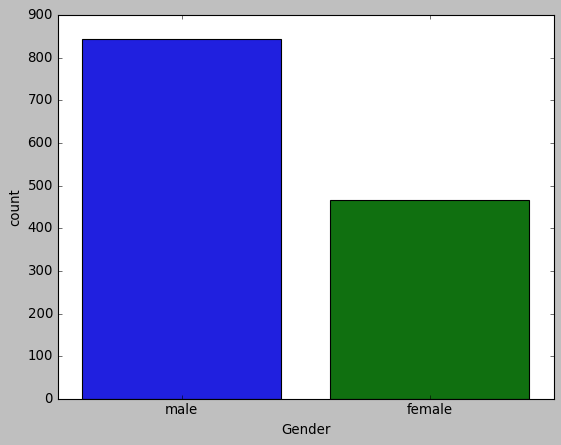

<Figure size 960x480 with 0 Axes>

In [86]:
# Method 2 - seaborn
fig = sns.countplot(x=titanic.Gender)

plt.figure(figsize=(12,6))
fig.figure.savefig("../figures/titanic_age_sns_gender.jpg", dpi=1000)

#### Use the right plot to visualize the column `Pclass`.

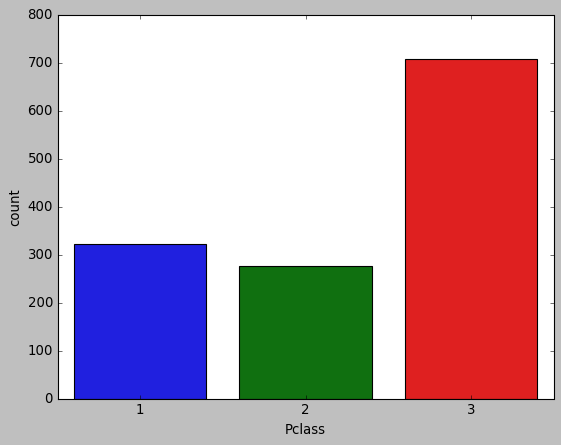

<Figure size 960x480 with 0 Axes>

In [87]:
fig = sns.countplot(x=titanic.Pclass)

plt.figure(figsize=(12,6))
fig.figure.savefig("../figures/titanic_Pclass.jpg", dpi=1000)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

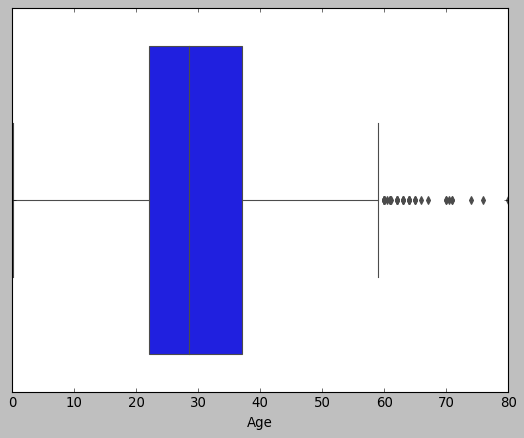

<Figure size 960x480 with 0 Axes>

In [88]:
fig = sns.boxplot(x="Age", data=titanic)

plt.figure(figsize=(12,6))
fig.figure.savefig("../figures/titanic_age_boxplot.jpg", dpi=1000)

In [ ]:
"""
A boxplot summarizes the statistics of a numerical distribution: IQR 
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
The age of most of the passangers falls within 22-38 (approx) (50% of the data is concentrated there).
25% of the passengers were less than 22 and 25% of them were over 38 years old
Also the min age is zero, probably because the NaN were filled with 0.
While the max is 60 (counting greater values as outliers)
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

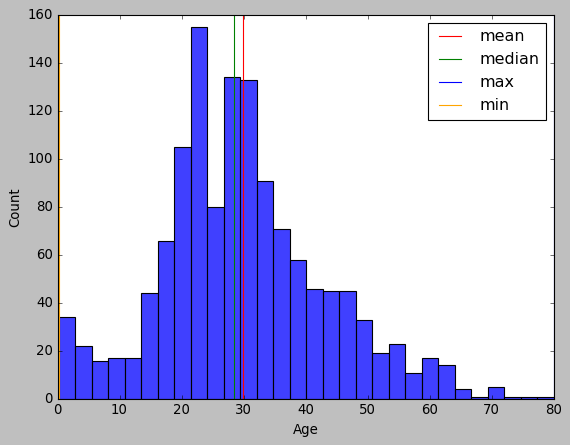

<Figure size 960x480 with 0 Axes>

In [89]:
graf = sns.histplot(x=titanic.Age)

graf.axvline(x=titanic.Age.mean(), c="red", label="mean")
graf.axvline(x=titanic.Age.median(), c="green", label="median")
graf.axvline(x=titanic.Age.max(), c="blue", label="max")
graf.axvline(x=titanic.Age.min(), c="orange", label="min")

plt.legend()

plt.figure(figsize=(12,6))
graf.figure.savefig("../figures/titanic_age_statistics_distribution", dpi=1000)

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
The amount of people per age i.e. the distribution
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

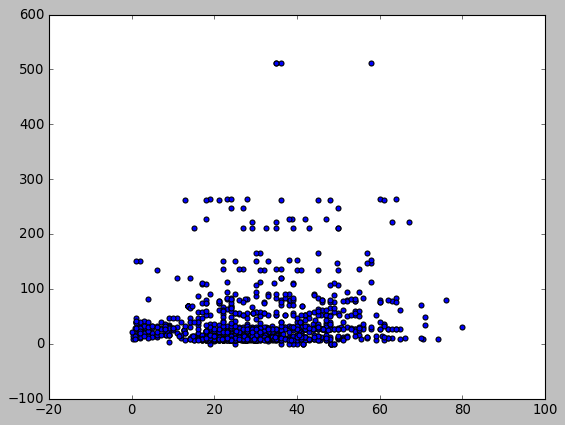

<Figure size 960x480 with 0 Axes>

In [91]:
# Method 1 - matplotlib
fig = plt.scatter(x=titanic["Age"], y=titanic["Fare"])

plt.figure(figsize=(12,6))
fig.figure.savefig("../figures/titanic_fare_age_matplotlib.jpg", dpi=1000)

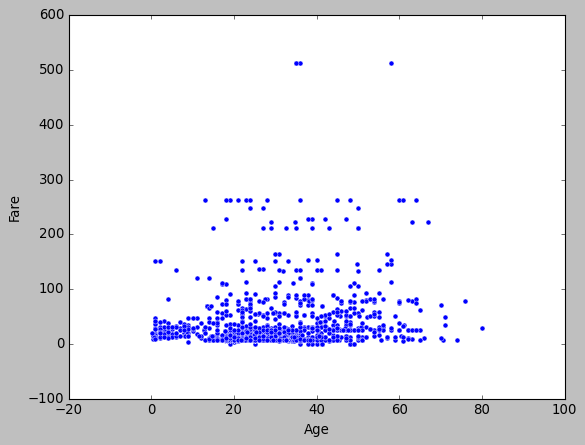

<Figure size 960x480 with 0 Axes>

In [92]:
# Method 2 - seaborn
fig = sns.scatterplot(x="Age", y="Fare", data=titanic)

plt.figure(figsize=(12,6))
fig.figure.savefig("../figures/titanic_fare_age_sns.jpg", dpi=1000)

In [ ]:
# There doesn't seem to be a linear relationship: people from different ages pay different fares

#### Plot the correlation matrix using seaborn.

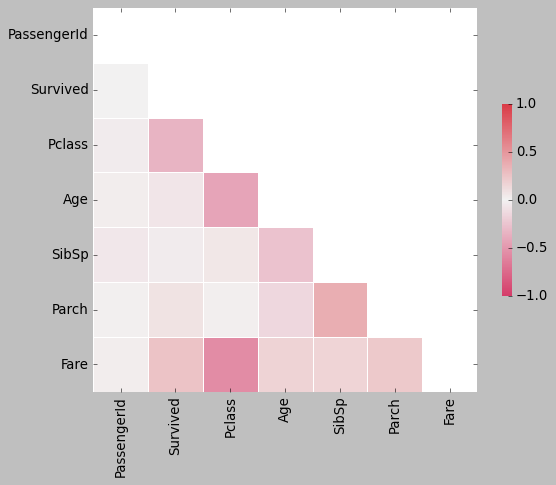

In [94]:
corr = titanic.corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,  
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            cbar_kws={"shrink": .5} #steps for the scale
);


#### What are the most correlated features?

In [ ]:
"""
Fare and Pclass, Survived and Pclass (i wonder why...........)
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

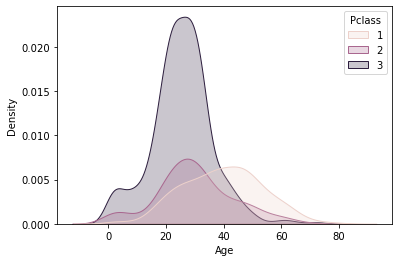

<Figure size 864x432 with 0 Axes>

In [12]:
sns.kdeplot(x=titanic.Age, hue=titanic.Pclass, fill=True)

plt.figure(figsize=(12,6))
fig.figure.savefig("../figures/titanic_age_Pclass_distr.jpg", dpi=1000)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

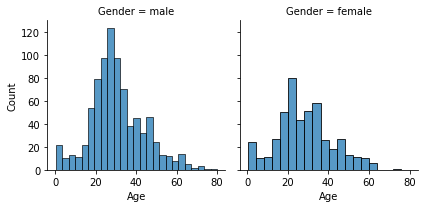

<Figure size 864x432 with 0 Axes>

In [13]:
g = sns.FacetGrid(titanic, col="Gender")
g.map_dataframe(sns.histplot, x="Age")

plt.figure(figsize=(12,6))
g.figure.savefig("../figures/titanic_age_gender_facetgrid", dpi=1000)